In [1]:
print('\nSteane Code - Full Implementation')


Steane Code - Full Implementation


### Steane Code - Full Implementation
Steane's code is a 7-qubit quantum error correction code that can correct any arbitrary single-qubit error. 
It is based on the classical [7,4,3] Hamming code and uses CSS (Calderbank-Shor-Steane) construction to protect quantum information.

This notebook demonstrates:
- Encoding a logical |0⟩
- Injecting a bit-flip error
- Measuring error syndromes
- Correcting the error
- Final measurement using QASM simulator


In [94]:
from qiskit import QuantumRegister
from qiskit import ClassicalRegister
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit import *
import matplotlib.pyplot as plt

### Step 1: Encoding the logical |0⟩ state using Steane Code

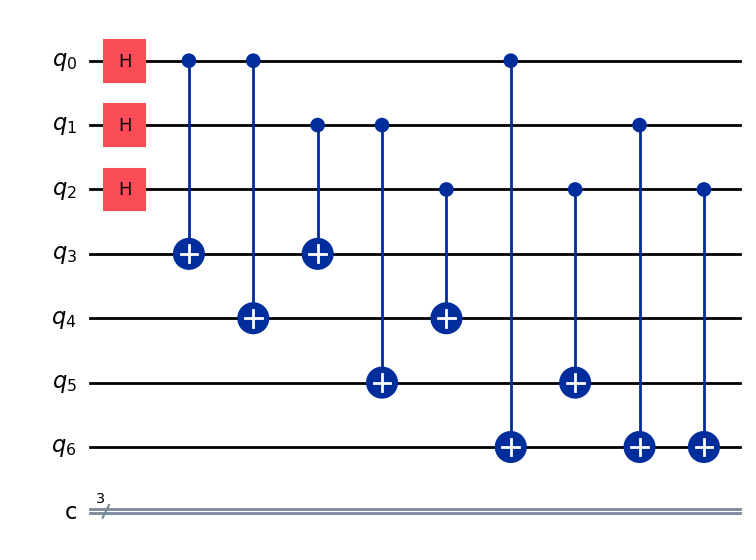

In [119]:
def steane_encode():
    qc = QuantumCircuit(7, 3)
    # Superposition on first 3 qubits
    qc.h([0,1,2])
    # Encoding redundancy via CNOTs
    qc.cx(0, [3,4])
    qc.cx(1, [3,5])
    qc.cx(2, [4,5])
    # More parity for phase protection
    qc.cx(0, 6)
    qc.cx(1, 6)
    qc.cx(2, 6)
    return qc

qc = steane_encode()
qc.draw('mpl')

### Step 2: Injecting an error (X gate on qubit 3)

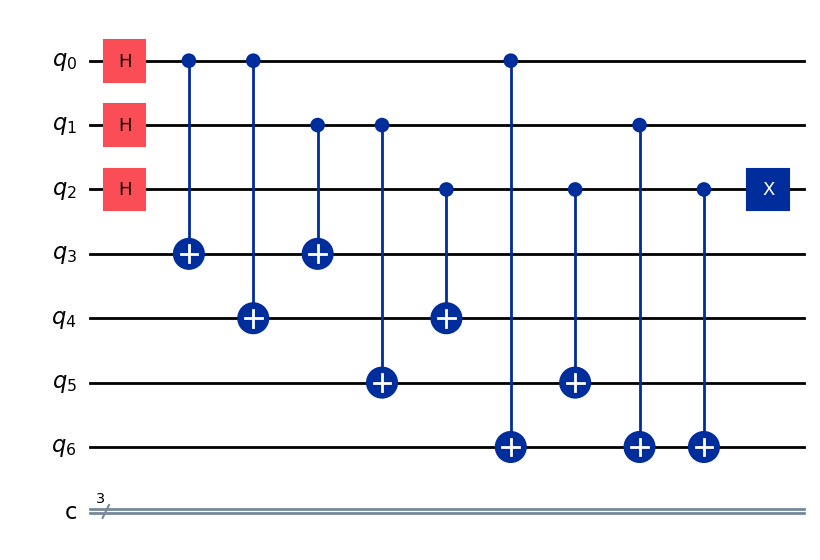

In [120]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
# state = Statevector.from_instruction(qc)
# Display circuit as LaTeX
# qc.draw(output = 'latex')
qc.x(2)
qc.draw('mpl')

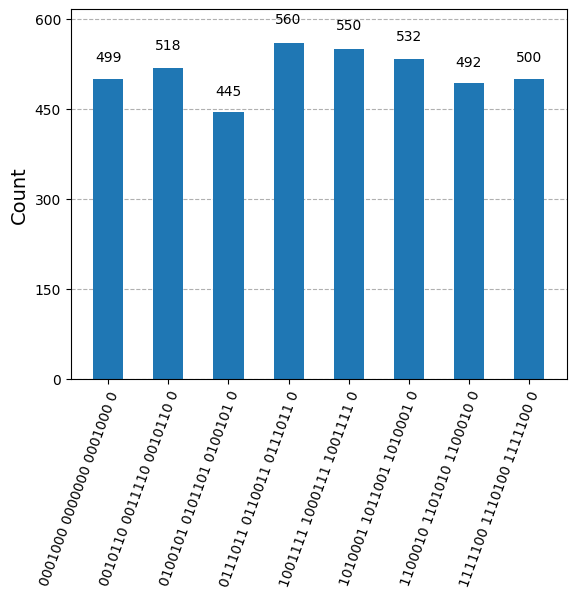

In [42]:
# qc.measure_all()
# backend = Aer.get_backend('qasm_simulator')
# tqc = transpile(qc, backend)
# job = backend.run(tqc, shots=4096)
# result = job.result()
# counts = result.get_counts()
# plot_histogram(counts)

### Step 3: Syndrome Measurement

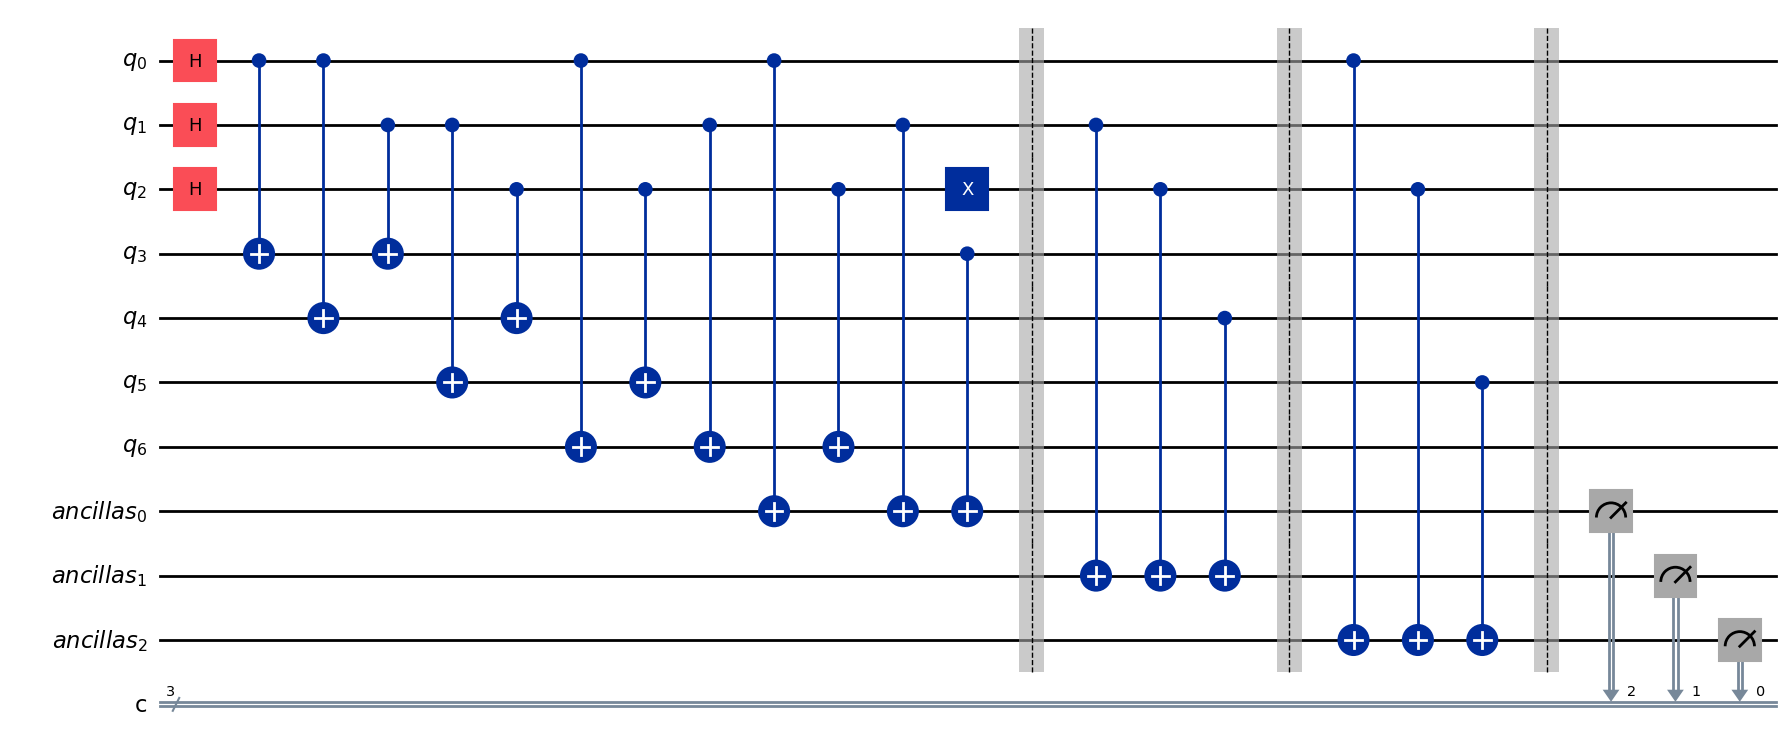

In [121]:
# Add Error (X) on qbit 4
# qc.x(2)
# Add 3 ancilla qubits for syndrome detection
qc.add_register(qc.qregs[0].__class__(3, 'ancillas'))

# Use stabilizer generators (simplified for Steane code)
# These measure parity of selected qubit groups to detect bit-flip errors
qc.cx(0, 7)
qc.cx(1, 7)
qc.cx(3, 7)
qc.barrier()

qc.cx(1, 8)
qc.cx(2, 8)
qc.cx(4, 8)
qc.barrier()

qc.cx(0, 9)
qc.cx(2, 9)
qc.cx(5, 9)
qc.barrier()


# Measure syndrome bits
qc.measure(7, 2)
qc.measure(8, 1)
qc.measure(9, 0)

# qc.x(2)  # Correct bit-flip on qubit 3
qc.draw('mpl')

### Step 4: Error Correction (Manual Based on Syndrome)

In [107]:
backend = Aer.get_backend('qasm_simulator')
tqc = transpile(qc, backend)
job = backend.run(tqc, shots=4096)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)
# NOTE: In a real quantum processor, classical logic would interpret the syndrome and apply correction.
# For this demo, we assume a known single-qubit error and directly correct it:
qc.x(2)  # Correct bit-flip on qubit 3
qc.draw('mpl')

### Step 5: Final Measurement

In [108]:
qc.measure_all()

### Step 6: Run the Full Circuit on QASM Simulator

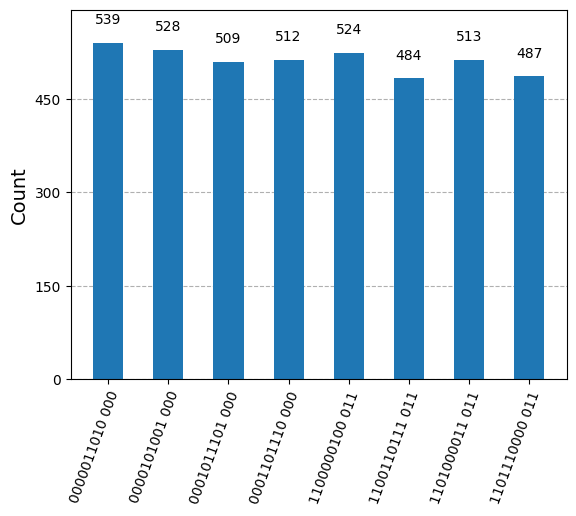

In [109]:
backend = Aer.get_backend('qasm_simulator')
tqc = transpile(qc, backend)
job = backend.run(tqc, shots=4096)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)
# state = Statevector.from_instruction(qc)
# Display circuit as LaTeX
# state.draw(output = 'latex')